<a href="https://colab.research.google.com/github/sfiddes/teaching/blob/main/example_notebooks/read_and_plot_ACCESS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Intro
- A quick intro to reading netcdf files and extracting information 

## Import the packages needed

In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
import scipy
import pandas as pd

## Load the data
- Use xarray 
- You will need to put the model data in your own directory and update the file path (`fdir`)
- If you have multiple files (eg. all the model data) in the same directory, you can use instead: 

```
fdir = '/content/drive/My Drive/Colab Notebooks/example_notebooks/data/bx400_SH_met_daily_*' 
data = xr.open_mfdataset(fdir)
```





In [2]:
fdir = '/content/drive/My Drive/Colab Notebooks/example_notebooks/data/bx400_SH_met_daily_2016-03.nc' # You will need to change this to your own directory 
data = xr.open_dataset(fdir) # Use xarray to open netcdf file 

## Explore the data: 
- click on the Data variables, then click the the two icons on the right hand side to view the attributes and the data report
- Do the same for the Coordinates

In [3]:
data # print out the data information 

<xarray.Dataset>
Dimensions:        (lat: 73, lat_v: 74, lon: 192, lon_u: 192, time: 31)
Coordinates:
  * lat            (lat) float64 -89.38 -88.12 -86.88 ... -1.875 -0.625 0.625
  * lat_v          (lat_v) float64 -90.0 -88.75 -87.5 -86.25 ... -1.25 0.0 1.25
  * lon_u          (lon_u) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * lon            (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * time           (time) datetime64[ns] 2016-03-01T12:00:00 ... 2016-03-31T1...
Data variables: (12/37)
    bldepth        (time, lat, lon) float32 ...
    orog           (time, lat, lon) float32 ...
    ps             (time, lat, lon) float32 ...
    rsdt           (time, lat, lon) float32 ...
    rsut           (time, lat, lon) float32 ...
    rsutcs         (time, lat, lon) float32 ...
    ...             ...
    tas_max        (time, lat, lon) float32 ...
    huss           (time, lat, lon) float32 ...
    hfls           (time, lat, lon) float32 ...
    hfss           (time, lat, lon) float32 ...
    field3230      (time, lat, lon) float32 ...
    field3230_max  (time, lat, lon) float32 ...

In [4]:
# Isolate a single variable 
data.rsds # Can also use data['rsds']

<xarray.DataArray 'rsds' (time: 31, lat: 73, lon: 192)>
[434496 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... -1.875 -0.625 0.625
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * time     (time) datetime64[ns] 2016-03-01T12:00:00 ... 2016-03-31T12:00:00
Attributes:
    stash_item:     235
    long_name:      TOTAL DOWNWARD SURFACE SW FLUX
    cell_methods:   time0: mean
    units:          W m-2
    stash_section:  1
    name:           rsds
    standard_name:  surface_downwelling_shortwave_flux_in_air

## Do some math: 
https://xarray.pydata.org/en/v0.10.4/computation.html
- Different arithmatic
- Different dimensions 

In [5]:
data.rsds.mean() # Will produce the mean over the enitre data set. Try also .min() or .sum() 

<xarray.DataArray 'rsds' ()>
array(155.12706, dtype=float32)

In [6]:
data.rsds.mean('time') # Can choose a dimenstion to average over (try also lat or lon)

<xarray.DataArray 'rsds' (lat: 73, lon: 192)>
array([[ 29.596922,  29.473206,  29.563465, ...,  29.164536,  29.412207,
         29.468685],
       [ 30.043089,  29.935726,  30.216434, ...,  30.29074 ,  30.242111,
         30.237059],
       [ 32.594555,  32.609333,  32.566902, ...,  32.482006,  32.72513 ,
         32.58261 ],
       ...,
       [247.00398 , 234.93297 , 233.27083 , ..., 268.77982 , 262.32077 ,
        259.09842 ],
       [231.50581 , 224.72993 , 218.02144 , ..., 249.70346 , 249.30031 ,
        243.62276 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... -1.875 -0.625 0.625
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

## Plot the data
- Map 
- Time series 
- https://xarray.pydata.org/en/v0.10.4/plotting.html

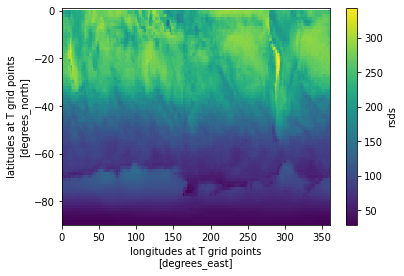

In [7]:
data.rsds.mean('time').plot(); # plot the mean over time (try also plotting over lat,lon)

- There are neater mapping fuctions (cartopy), but they don't work very well with google collab

---

- To make a time-series, we will choose just one point by using the interpolation function: http://xarray.pydata.org/en/stable/user-guide/interpolation.html
- See also https://xarray.pydata.org/en/v0.10.4/indexing.html# (if you want to select one time eg.) 

In [8]:
data1D = data.interp(lat=-54.6208, lon=158.8556, lat_v=-54.6208, lon_u=158.8556) # have to do it for both lat/lon dimensions.. 
data1D

<xarray.Dataset>
Dimensions:        (time: 31)
Coordinates:
  * time           (time) datetime64[ns] 2016-03-01T12:00:00 ... 2016-03-31T1...
    lat            float64 -54.62
    lon            float64 158.9
    lat_v          float64 -54.62
    lon_u          float64 158.9
Data variables: (12/37)
    bldepth        (time) float64 36.67 36.67 366.7 36.67 ... 349.0 713.8 260.4
    orog           (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ps             (time) float64 1.01e+05 1.003e+05 ... 1.01e+05 1.009e+05
    rsdt           (time) float64 328.4 324.3 320.2 316.0 ... 215.7 211.9 208.2
    rsut           (time) float64 151.3 171.9 132.9 164.9 ... 91.36 117.4 70.17
    rsutcs         (time) float64 44.1 47.05 48.65 46.57 ... 37.43 37.73 34.68
    ...             ...
    tas_max        (time) float64 281.7 281.6 279.9 280.9 ... 281.2 281.1 281.2
    huss           (time) float64 0.006311 0.005851 ... 0.004182 0.005182
    hfls           (time) float64 -29.88 1.374 53.17 ... 23.67 26.78 7.946
    hfss           (time) float64 -31.53 -18.38 -2.18 ... -12.09 -0.9082 -11.46
    field3230      (time) float64 11.65 11.46 11.91 12.85 ... 12.23 6.308 9.564
    field3230_max  (time) float64 13.3 14.28 14.17 15.06 ... 15.71 14.22 14.02

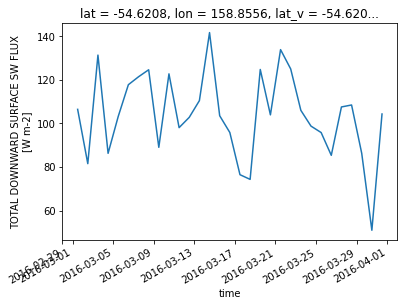

In [9]:
data1D.rsds.plot(); 

# Save the data
- Often with model data it is best to extract the data you need just once and save it, rather than opening the netcdf files everytime

- If the data you want is 2D+ save as another (smaller) netcdf file. 
- If the data is say just a time series, convert to a csv using Pandas
https://pandas.pydata.org/docs/reference/frame.html

In [10]:
data.rsds.mean('time').to_netcdf('/content/drive/My Drive/Colab Notebooks/example_notebooks/data/example_netcdf.nc') # Write xarray dataarray to netcdf

In [11]:
df = data1D.to_pandas() # Convert to a pandas dataframe
df # also try .head() or .tail() to print out just the start or end of dataframe

,bldepth,orog,ps,rsdt,rsut,rsutcs,rsdscs,rsuscs,rsds,rlut,rlutcs,rlds,rldscs,field4203,field4204,field5205,field5206,prrn,prsn,pr,field9203,field9204,field9205,psl,lwp,clivi,field30461,uas,vas,tas,tas_min,tas_max,huss,hfls,hfss,field3230,field3230_max,lat,lon,lat_v,lon_u
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-01 12:00:00,36.666672,0.0,100988.235414,328.394604,151.322773,44.096157,228.429900,16.571157,106.387113,196.743899,241.224676,349.635777,291.266058,7.132683e-05,0.0,4.285756e-06,0.000000e+00,7.561259e-05,0.000000e+00,7.561259e-05,0.983984,0.830260,0.708045,100985.646459,0.133540,0.164528,27.103936,6.331996,-9.320750,280.833748,279.966828,281.716261,0.006311,-29.880952,-31.525469,11.654533,13.303346,-54.6208,158.8556,-54.6208,158.8556
2016-03-02 12:00:00,36.666672,0.0,100250.292077,324.280023,171.925337,47.045774,226.153824,16.865258,81.497368,219.369646,245.379200,339.695824,276.864036,3.326084e-05,0.0,7.626667e-06,0.000000e+00,4.088751e-05,0.000000e+00,4.088751e-05,0.989033,0.187117,0.351569,100248.863883,0.149764,0.025982,17.891629,8.760864,-5.751093,280.316597,279.393976,281.557822,0.005851,1.373936,-18.382089,11.463721,14.284529,-54.6208,158.8556,-54.6208,158.8556
2016-03-03 12:00:00,366.673207,0.0,101196.765993,320.160273,132.930635,48.653292,229.661497,17.724174,131.249252,219.443588,241.630944,301.407012,255.818815,5.088940e-06,0.0,0.000000e+00,0.000000e+00,5.088940e-06,0.000000e+00,5.088940e-06,0.727889,0.158174,0.377396,101195.586080,0.041520,0.044332,12.861071,10.530310,-2.804086,279.326435,278.785806,279.920549,0.004612,53.174088,-2.179910,11.907768,14.169127,-54.6208,158.8556,-54.6208,158.8556
2016-03-04 12:00:00,36.666672,0.0,99848.403864,316.036782,164.949070,46.572454,221.525157,17.185462,86.231391,198.228160,238.683930,342.035660,274.298807,1.227888e-04,0.0,8.236885e-06,0.000000e+00,1.310257e-04,0.000000e+00,1.310257e-04,0.984244,0.689897,0.425939,99847.610918,0.136437,0.274779,18.996068,8.928898,-9.153368,280.475334,279.747478,280.859278,0.005977,-10.845377,-25.566413,12.851619,15.057400,-54.6208,158.8556,-54.6208,158.8556
2016-03-05 12:00:00,549.810773,0.0,99434.157536,311.910960,148.725681,50.245240,219.444547,16.667291,103.144819,215.588924,244.772461,319.626494,255.020778,2.101419e-05,0.0,1.179558e-05,2.578486e-06,3.280977e-05,2.578486e-06,3.538825e-05,0.889605,0.724075,0.013020,99435.897573,0.099066,0.158953,10.011051,15.118247,-1.619052,278.986708,278.277315,279.884304,0.004488,93.563025,8.916094,15.394467,18.120009,-54.6208,158.8556,-54.6208,158.8556
2016-03-06 12:00:00,769.805894,0.0,100562.186874,307.784236,132.603944,44.998720,221.975051,16.039229,117.686767,231.444932,244.747055,276.768254,244.670341,1.998122e-05,0.0,5.405281e-06,4.406600e-07,2.538650e-05,4.406600e-07,2.582716e-05,0.381801,0.394114,0.009106,100563.517578,0.030566,0.053481,8.605181,9.427469,1.601347,278.410479,278.099690,278.638337,0.004092,72.702573,12.554617,10.228096,11.947930,-54.6208,158.8556,-54.6208,158.8556
2016-03-07 12:00:00,716.855687,0.0,100232.276225,303.658006,129.530938,44.636521,221.445176,16.986131,121.309800,212.999480,240.432603,289.083882,242.652538,7.639957e-07,0.0,2.015306e-05,2.314834e-05,2.091705e-05,2.314834e-05,4.406540e-05,0.465281,0.560652,0.001555,100233.979313,0.035520,0.073103,8.661982,12.924230,-0.050681,278.021822,277.384566,278.512478,0.004057,98.390083,27.388796,13.166207,15.908341,-54.6208,158.8556,-54.6208,158.8556
2016-03-08 12:00:00,494.329486,0.0,100582.294886,299.533663,123.373193,48.655111,214.742545,18.470252,124.528360,205.169008,238.093325,305.620975,252.576470,3.046859e-05,0.0,1.205585e-05,9.689558e-06,4.252444e-05,9.689558e-06,5.221400e-05,0.626134,0.641030,0.200536,100583.536379,0.065538,0.131043,11.604867,14.035432,-1.507057,278.811048,277.584776,279.858295,0.004594,75.037481,11.191266,14.598301,16.507352,-54.6208,158.8556,-54.6208,158.8556
2016-03-09 12:00:00,311.712045,0.0,100663.474966,295.412542,146.683097,43.823005,209.665864,16.080180,88.987185,212.040345,239.

In [12]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/example_notebooks/data/example_csv.nc')